# Projek 3: Ensemble
## Anggota Kelompok:
- Nabila Zulfika Hemadewi
- Vista Sasmita Padmanagara

---

## Tugas
Membuat model untuk memprediksi kematian akibat Gagal Jantung.

**Tentang Dataset**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global , mengambil sekitar 17,9 juta jiwa setiap tahun , yang menyumbang 31% dari semua kematian di seluruh dunia .
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

**Informasi atribut:**
- Usia
- Penurunan sel darah merah atau hemoglobin (boolean)
- Tingkat enzim CPK dalam darah (mcg/L)
- Jika pasien menderita diabetes (boolean)
- Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)
- Jika pasien memiliki hipertensi (boolean)
- Trombosit dalam darah (kiloplatelet/mL)
- Kadar kreatinin serum dalam darah (mg/dL)
- Kadar natrium serum dalam darah (mEq/L)
- Wanita atau pria (biner)

***Note**

Ada 2 kolom yang tidak bisa dijadikan fitur:
- **DEATH_EVENT**, mengkodekan apakah pasien meninggal (1) atau apakah mereka disensor (0). Menyensor berarti bahwa para ilmuwan kehilangan kontak dengan pasien.

- **time**, menangkap waktu kejadian. Artinya, waktu di mana pasien meninggal atau disensor.

time sangat berkorelasi dengan DEATH_EVENT karena kematian pasien berdampak langsung pada waktu, bukan sebaliknya . Jika tujuannya adalah untuk memprediksi kematian atau kelangsungan hidup pasien, maka time tidak boleh digunakan sebagai input model.

# Preparing Data

In [1]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# scaling data
from sklearn.preprocessing import StandardScaler

# SMOTE
from imblearn.over_sampling import ADASYN

# splitting data
from sklearn.model_selection import train_test_split

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# saving model
import pickle

In [2]:
df = pd.read_csv("/content/drive/MyDrive/tugas_studi/heart_failure_clinical_records_dataset.csv")

In [3]:
print(df.shape)

(299, 13)


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Cleaning Data

Terdapat sebuah kolom yang pengejaan namanya kurang tepat yaitu "anaemia" yang seharusnya adalah "anemia" dan kolom "DEATH_EVENT" adalah kolom yang akan kita jadikan target prediksi. Mari kita lakukan **rename** terhadap kedua kolom tersebut.

- anaemia menjadi **anemia**
- DEATH_EVENT menjadi **target**

In [6]:
df = df.rename(columns={"anaemia": "anemia"})
df = df.rename(columns={"DEATH_EVENT": "target"})

**Cek apakah ada nilai null atau tidak.**

In [7]:
df.isnull().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

**Cek apakah ada nilai duplikat atau tidak.**

In [8]:
df.duplicated().sum()

0

**Cek statistik deskriptif dataframe.**

In [9]:
df.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis (EDA)

Pisahkan antara kolom kategorikal dan kolom numerik.

In [10]:
cat_cols = df.loc(axis=1)['anemia','diabetes','high_blood_pressure',
                          'sex','smoking','target']
num_cols = df.loc(axis=1)['age','creatinine_phosphokinase','ejection_fraction',
                          'platelets','serum_creatinine','serum_sodium','time']

### Categorical Columns

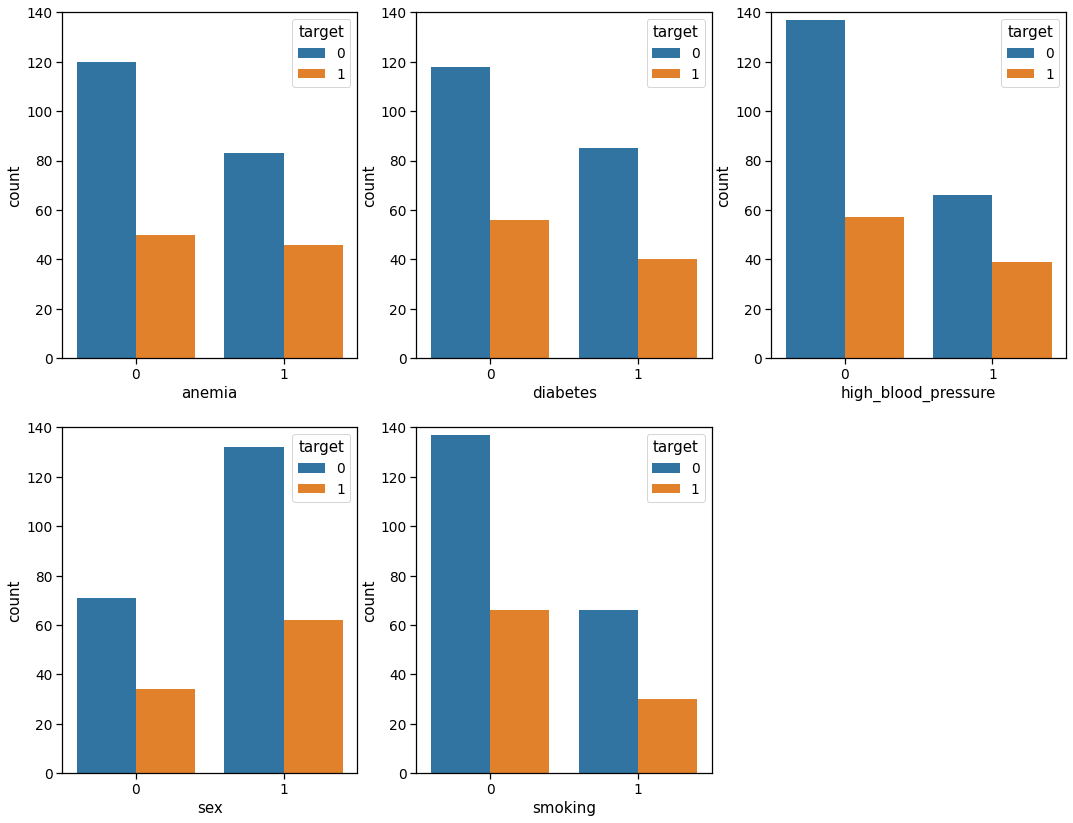

In [11]:
sns.set_context("notebook", font_scale=1.25)

fig, ax = plt.subplots(2,3, figsize=(18,14))
[sns.countplot(data=df, x=cat, hue="target", ax=ax.flatten()[i]) 
 for i,cat in enumerate(cat_cols.drop('target',axis=1))]
ax.flatten()[-1].set_visible(False) # Remove the 6th empty plot
[y_ax.set_ylim(0,140) for y_ax in ax.flatten()]
plt.show()

**(0 = No, 1 = Yes)**

- Anemia, diabetes, dan merokok dikaitkan dengan peningkatan risiko kematian.
- Mereka yang menderita tekanan darah tinggi memiliki peningkatan risiko kematian.
- Mereka yang tidak atau jarang melakukan sex memiliki peningkatan risiko kematian.

## Numerical Columns

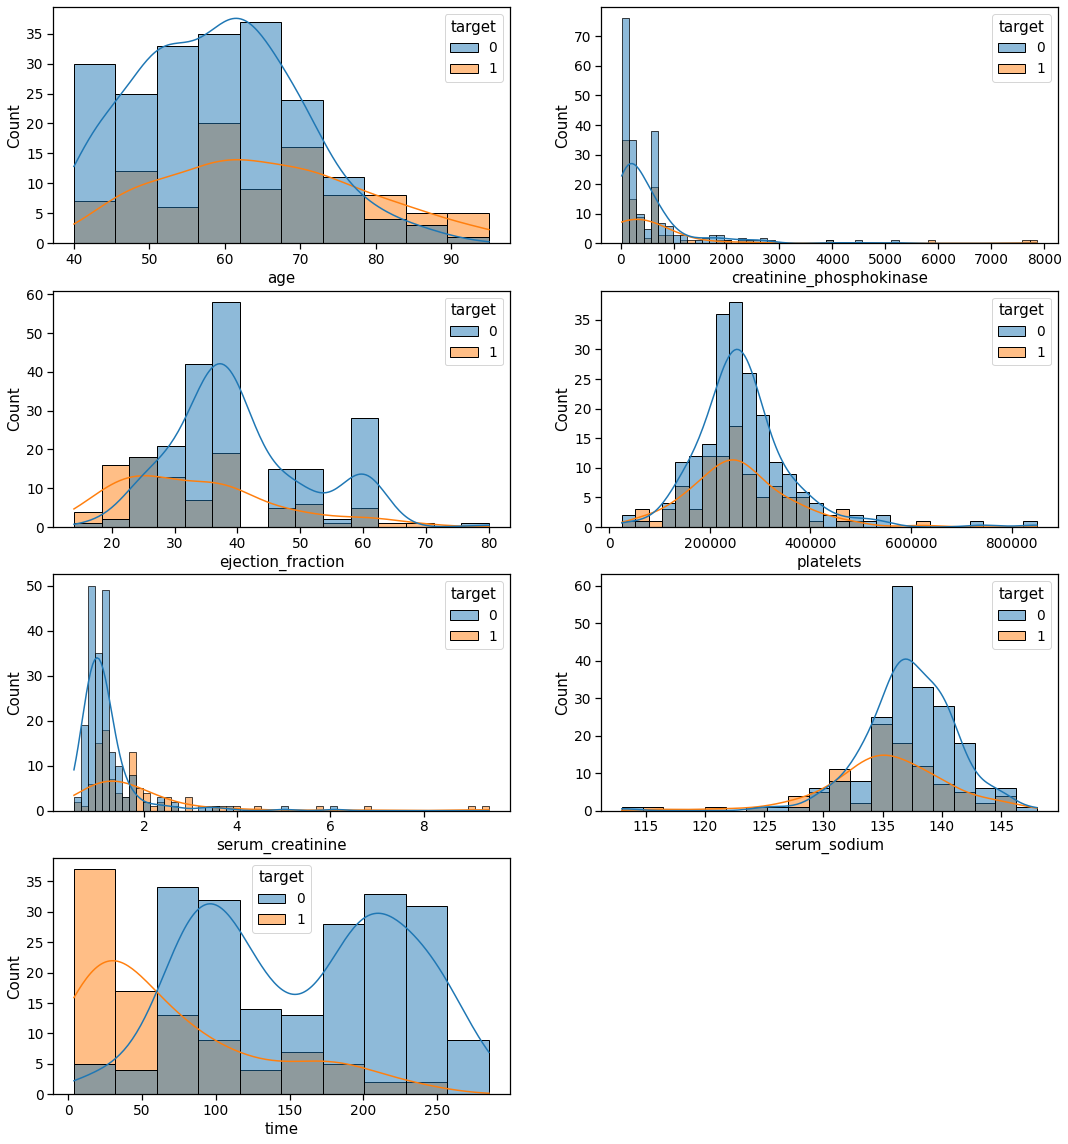

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,20))
[sns.histplot(data=df, x=num, hue="target", kde=True, ax=ax.flatten()[i]) for i,num in enumerate(num_cols)]
ax.flatten()[-1].set_visible(False)
plt.show()

- Peningkatan usia tampaknya memainkan sedikit peran dalam peningkatan kematian.
- Peningkatan serum_creatinine tampaknya menunjukkan peningkatan kematian
- creatinine_phosphokinase, platelets, dan serum_sodium tampaknya tidak memiliki pengaruh yang signifikan dalam memprediksi hasil pasien

## Correlation Analysis

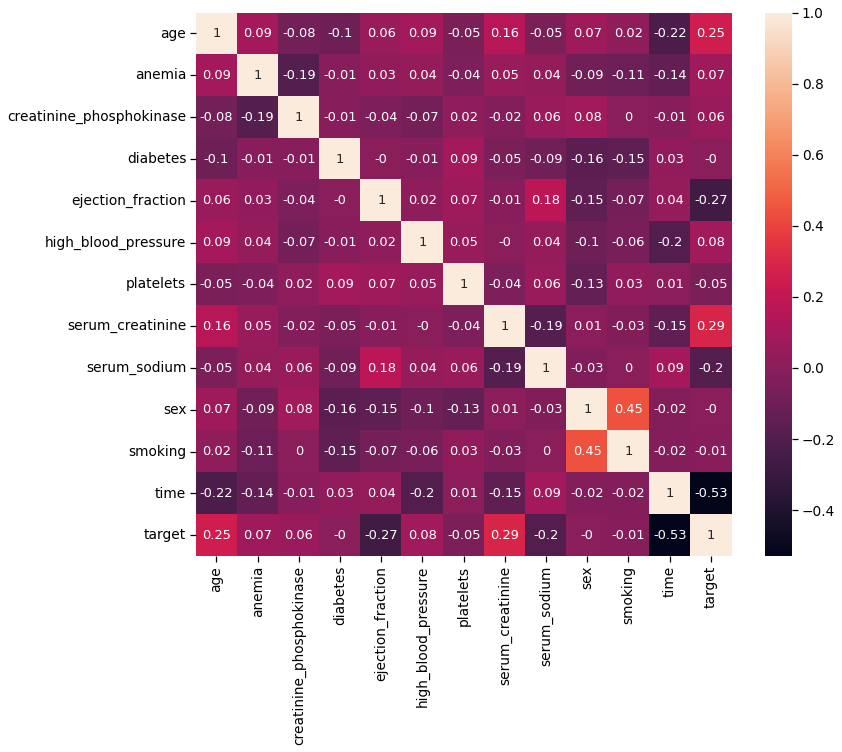

In [13]:
plt.figure(figsize=(12,10))
fig = sns.heatmap(data=round(df.corr(),2), annot=True, annot_kws={"fontsize":13})
plt.show()

Bebeberapa fitur sangat mempengaruhi target, yaitu:
- age
- ejection_fraction
- serum_creatinine
- time

# Preprocessing Data
## Feature Scaling

In [14]:
scaler = StandardScaler()
datax = df.drop(['time', 'target'], axis=1)

In [15]:
X = scaler.fit_transform(datax)
y = df['target']

## Cek keseimbangan data target.

In [16]:
df['target'].value_counts()

0    203
1     96
Name: target, dtype: int64

Dari informasi diatas, diketahui bahwa kumpulan **data tidak seimbang**. Kita perlu menyeimbangkannya dulu sebelum melakukan modelling terhadap data.

Tujuan kita adalah untuk memprediksi kematian pasien, maka time tidak boleh digunakan sebagai input model/fitur.

## Mengatasi ketimpangan kelas dengan teknik oversampling kelas minoritas 

Metode ini mirip dengan SMOTE tetapi menghasilkan jumlah sampel yang berbeda tergantung pada perkiraan distribusi lokal kelas yang akan di-oversampling.

In [17]:
resample = ADASYN(sampling_strategy='all', random_state=42)
X, y = resample.fit_resample(X,y)

y.value_counts()

0    203
1    200
Name: target, dtype: int64

## Splitting Data

Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(403, 11) (322, 11) (81, 11)


# Modelling: Ensemble

Ensemble yaitu metode membandingkan beberapa algoritma untuk mencari algoritma terbaik yang akan kita gunakan untuk keperluan machine learning. Terdapat 6 algoritma yang akan kita perbandingkan, yaitu:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vectore Machine (SVM)
5. Naive Bayes
6. K-Nearest Neighbor (KNN)

In [20]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_cv = lr.predict(X_test)

In [21]:
#  Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_cv1 = dt.predict(X_test)

In [22]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_cv2 = rf.predict(X_test)

In [23]:
# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
        
pred_cv3 = svm.predict(X_test)

In [24]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

pred_cv4 = nb.predict(X_test)

In [25]:
# K-Nearest Neighbor (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_cv5 = knn.predict(X_test)

### Model Evaluation

In [26]:
print("Logistic Regression:", accuracy_score(y_test, pred_cv))
print("Decision Tree:", accuracy_score(y_test, pred_cv1))
print("Random Forest:", accuracy_score(y_test, pred_cv2))
print("SVM:", accuracy_score(y_test, pred_cv3))
print("Naive Bayes:", accuracy_score(y_test, pred_cv4))
print("KNN:", accuracy_score(y_test, pred_cv5))

Logistic Regression: 0.7407407407407407
Decision Tree: 0.8024691358024691
Random Forest: 0.8271604938271605
SVM: 0.8271604938271605
Naive Bayes: 0.6419753086419753
KNN: 0.7037037037037037


Random Forest adalah algoritma terbaik yang menghasilkan akurasi score tertinggi.

**Jadi, algoritma yang akan kita gunakan dalam prediksi ini adalah Random Forest.**

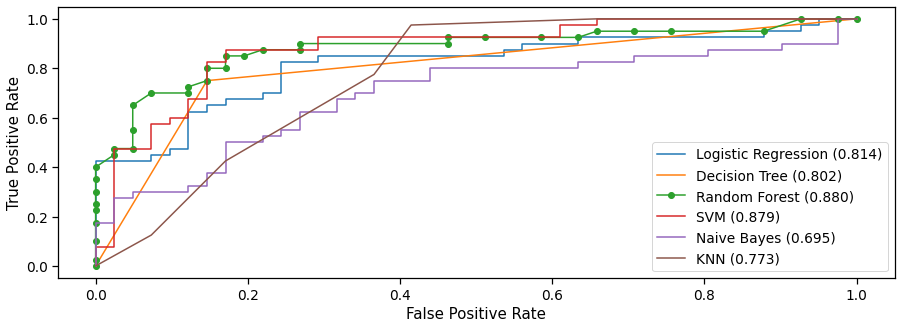

In [27]:
#define metrics
y_pred_proba1 = lr.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
auc1 = auc(fpr1, tpr1)

y_pred_proba2 = dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba2)
auc2 = auc(fpr2, tpr2)

y_pred_proba3 = rf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba3)
auc3 = auc(fpr3, tpr3)

y_pred_proba4 = svm.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba4)
auc4 = auc(fpr4, tpr4)

y_pred_proba5 = nb.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = roc_curve(y_test,  y_pred_proba5)
auc5 = auc(fpr5, tpr5)

y_pred_proba6 = knn.predict_proba(X_test)[::,1]
fpr6, tpr6, _ = roc_curve(y_test,  y_pred_proba6)
auc6 = auc(fpr6, tpr6)

#create ROC curve
plt.figure(figsize=(15,5))

plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
plt.plot(fpr2,tpr2, label='Decision Tree (%0.3f)' % auc2)
plt.plot(fpr3, tpr3, marker="o", label='Random Forest (%0.3f)' % auc3)
plt.plot(fpr4, tpr4, label='SVM (%0.3f)' % auc4)
plt.plot(fpr5, tpr5, label='Naive Bayes (%0.3f)' % auc5)
plt.plot(fpr6, tpr6, label='KNN (%0.3f)' % auc6)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

### Predictive System

In [28]:
''' data yang dibutuhkan pada input_data
input_data =
["age", "anemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets",
 "serum_creatinine", "serum_sodium", "sex", "smoking"]'''

input_data = (60,0,2656,1,30,0,305000,2.3,137,1,0)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshape)
print(prediction)

if (prediction==1):
  print("Meninggal")
else:
  print("Disensor")

[1]
Meninggal


## Saving Model

In [29]:
pickle.dump(rf, open('model.pkl', 'wb'))